In [13]:
# Import Dependencies
%matplotlib inline

# Begin Python Imports
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

# Data Manipulation
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

####Data Acquisition and Exploration and Import data

In [14]:
# Read 2018 airport data 
flight_data = pd.read_csv(r"C:\Users\shuchita\Downloads\2009.csv")

# Check first 2 instances and last 2 instances
flight_data.head(2).append(flight_data.tail(2))

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,1/1/2009,XE,1204,DCA,EWR,1100,1058.0,-2.0,18.0,1116.0,1158.0,8.0,1202,1206.0,4.0,0,NaN,0,62,68.0,42.0,199,NaN,NaN,NaN,NaN,NaN,NaN
1,1/1/2009,XE,1206,EWR,IAD,1510,1509.0,-1.0,28.0,1537.0,1620.0,4.0,1632,1624.0,-8.0,0,NaN,0,82,75.0,43.0,213,NaN,NaN,NaN,NaN,NaN,NaN
1048573,3/2/2009,WN,1217,DAL,LBB,1130,1125.0,-5.0,8.0,1133.0,1224.0,2.0,1240,1226.0,-14.0,0,NaN,0,70,61.0,51.0,293,NaN,NaN,NaN,NaN,NaN,NaN
1048574,3/2/2009,WN,1608,DAL,LBB,2015,2016.0,1.0,9.0,2025.0,2117.0,3.0,2130,2120.0,-10.0,0,NaN,0,75,64.0,52.0,293,NaN,NaN,NaN,NaN,NaN,NaN


###Dataset exploration

In [15]:
# Check dimension of dataset
flight_data.shape
print("There are "+ str(flight_data.shape[0]) +" rows and "+ str(flight_data.shape[1]) +" columns from dataset")

There are 1048575 rows and 28 columns from dataset


In [16]:
# Convert flight_data column to datetime format
flight_data['FL_DATE'] =  pd.to_datetime(flight_data['FL_DATE'], format='%m/%d/%Y')

In [17]:
# Check column type
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 28 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   FL_DATE              1048575 non-null  datetime64[ns]
 1   OP_CARRIER           1048575 non-null  object        
 2   OP_CARRIER_FL_NUM    1048575 non-null  int64         
 3   ORIGIN               1048575 non-null  object        
 4   DEST                 1048575 non-null  object        
 5   CRS_DEP_TIME         1048575 non-null  int64         
 6   DEP_TIME             1027599 non-null  float64       
 7   DEP_DELAY            1027599 non-null  float64       
 8   TAXI_OUT             1027017 non-null  float64       
 9   WHEELS_OFF           1027017 non-null  float64       
 10  WHEELS_ON            1026100 non-null  float64       
 11  TAXI_IN              1026101 non-null  float64       
 12  CRS_ARR_TIME         1048575 non-null  int64         
 1

###Handle of missing data

In [18]:
# Calculate the proportion of missing data

def checkMissing(data,perc=0):
    """ 
    Takes in a dataframe and returns
    the percentage of missing value.
    """
    missing = [(i, data[i].isna().mean()*100) for i in data]
    missing = pd.DataFrame(missing, columns=["column_name", "percentage"])
    missing = missing[missing.percentage > perc]
    print(missing.sort_values("percentage", ascending=False).reset_index(drop=True))

print("Proportion of missing data in columns")
checkMissing(flight_data)

Proportion of missing data in columns
            column_name  percentage
0           Unnamed: 27  100.000000
1     CANCELLATION_CODE   97.913549
2         CARRIER_DELAY   81.453401
3         WEATHER_DELAY   81.453401
4             NAS_DELAY   81.453401
5        SECURITY_DELAY   81.453401
6   LATE_AIRCRAFT_DELAY   81.453401
7   ACTUAL_ELAPSED_TIME    2.292063
8             ARR_DELAY    2.291968
9              AIR_TIME    2.291968
10            WHEELS_ON    2.143385
11             ARR_TIME    2.143385
12              TAXI_IN    2.143290
13             TAXI_OUT    2.055933
14           WHEELS_OFF    2.055933
15            DEP_DELAY    2.000429
16             DEP_TIME    2.000429


In [19]:
#Fill the missing value 0
flight_data['LATE_AIRCRAFT_DELAY']=flight_data['LATE_AIRCRAFT_DELAY'].fillna(0)
flight_data['CARRIER_DELAY']=flight_data['CARRIER_DELAY'].fillna(0)
flight_data['WEATHER_DELAY']=flight_data['WEATHER_DELAY'].fillna(0)
flight_data['NAS_DELAY']=flight_data['NAS_DELAY'].fillna(0)
flight_data['SECURITY_DELAY']=flight_data['SECURITY_DELAY'].fillna(0)

In [20]:
# Function that convert the 'HHMM' string to datetime.time
def format_heure(chaine):
    if pd.isnull(chaine):
        return np.nan
    else:
        if chaine == 2400: chaine = 0
        chaine = "{0:04d}".format(int(chaine))
        heure = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return heure
        # return pd.to_datetime(heure, format='%H:%M:%S')
    
    # pd.to_datetime(heure, format='%m/%d-%Y')

In [21]:
flight_data['DEP_TIME'] = flight_data['DEP_TIME'].apply(format_heure)
flight_data['CRS_DEP_TIME'] = flight_data['CRS_DEP_TIME'].apply(format_heure)

flight_data['ARR_TIME'] = flight_data['ARR_TIME'].apply(format_heure) 
flight_data['CRS_ARR_TIME'] = flight_data['CRS_ARR_TIME'].apply(format_heure)

flight_data['WHEELS_OFF'] = flight_data['WHEELS_OFF'].apply(format_heure)
flight_data['WHEELS_ON'] = flight_data['WHEELS_ON'].apply(format_heure)

In [22]:
# Convert flight_data column to datetime format

def time_difference(actual,plan):
    actual_time = pd.to_timedelta(actual.astype(str)) 
    plan_time = pd.to_timedelta(plan.astype(str))
    return actual_time.sub(plan_time).dt.total_seconds().div(60)

flight_data['WHEELS_OFF_elapse'] =  time_difference(flight_data['WHEELS_OFF'],flight_data['DEP_TIME'])
flight_data['WHEELS_ON_elapse'] =  time_difference(flight_data['ARR_TIME'] ,flight_data['WHEELS_ON'])

# Remove incorrect record
flight_data=flight_data[flight_data['WHEELS_OFF_elapse']>0]
flight_data=flight_data[flight_data['WHEELS_ON_elapse']>0]

In [23]:
# Check first 2 instances and last 2 instances
flight_data.head(2).append(flight_data.tail(2))

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,WHEELS_OFF_elapse,WHEELS_ON_elapse
0,2009-01-01,XE,1204,DCA,EWR,11:00:00,10:58:00,-2.0,18.0,11:16:00,11:58:00,8.0,12:02:00,12:06:00,4.0,0,NaN,0,62,68.0,42.0,199,0.0,0.0,0.0,0.0,0.0,NaN,18.0,8.0
1,2009-01-01,XE,1206,EWR,IAD,15:10:00,15:09:00,-1.0,28.0,15:37:00,16:20:00,4.0,16:32:00,16:24:00,-8.0,0,NaN,0,82,75.0,43.0,213,0.0,0.0,0.0,0.0,0.0,NaN,28.0,4.0
1048573,2009-03-02,WN,1217,DAL,LBB,11:30:00,11:25:00,-5.0,8.0,11:33:00,12:24:00,2.0,12:40:00,12:26:00,-14.0,0,NaN,0,70,61.0,51.0,293,0.0,0.0,0.0,0.0,0.0,NaN,8.0,2.0
1048574,2009-03-02,WN,1608,DAL,LBB,20:15:00,20:16:00,1.0,9.0,20:25:00,21:17:00,3.0,21:30:00,21:20:00,-10.0,0,NaN,0,75,64.0,52.0,293,0.0,0.0,0.0,0.0,0.0,NaN,9.0,3.0


In [24]:
# Check column type
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022919 entries, 0 to 1048574
Data columns (total 30 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   FL_DATE              1022919 non-null  datetime64[ns]
 1   OP_CARRIER           1022919 non-null  object        
 2   OP_CARRIER_FL_NUM    1022919 non-null  int64         
 3   ORIGIN               1022919 non-null  object        
 4   DEST                 1022919 non-null  object        
 5   CRS_DEP_TIME         1022919 non-null  object        
 6   DEP_TIME             1022919 non-null  object        
 7   DEP_DELAY            1022919 non-null  float64       
 8   TAXI_OUT             1022919 non-null  float64       
 9   WHEELS_OFF           1022919 non-null  object        
 10  WHEELS_ON            1022919 non-null  object        
 11  TAXI_IN              1022919 non-null  float64       
 12  CRS_ARR_TIME         1022919 non-null  object        
 1

In [25]:
# Drop the unused columns 

flight_data.drop(['Unnamed: 27', 
                  'CANCELLATION_CODE',
                  'CANCELLED',
                  'OP_CARRIER_FL_NUM',
                  'CRS_DEP_TIME',
                  'DEP_TIME',
                  'CRS_ARR_TIME',
                  'ARR_TIME',
                  'WHEELS_ON',
                  'WHEELS_OFF'
                 ],
                 axis = 1, inplace = True)

In [26]:
#Check number of missing values
flight_data.isna().sum()

FL_DATE                   0
OP_CARRIER                0
ORIGIN                    0
DEST                      0
DEP_DELAY                 0
TAXI_OUT                  0
TAXI_IN                   0
ARR_DELAY              1546
DIVERTED                  0
CRS_ELAPSED_TIME          0
ACTUAL_ELAPSED_TIME    1546
AIR_TIME               1546
DISTANCE                  0
CARRIER_DELAY             0
WEATHER_DELAY             0
NAS_DELAY                 0
SECURITY_DELAY            0
LATE_AIRCRAFT_DELAY       0
WHEELS_OFF_elapse         0
WHEELS_ON_elapse          0
dtype: int64

In [27]:
flight_data = flight_data.dropna()

In [28]:
#Check number of missing values
flight_data.isna().sum()

FL_DATE                0
OP_CARRIER             0
ORIGIN                 0
DEST                   0
DEP_DELAY              0
TAXI_OUT               0
TAXI_IN                0
ARR_DELAY              0
DIVERTED               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
CARRIER_DELAY          0
WEATHER_DELAY          0
NAS_DELAY              0
SECURITY_DELAY         0
LATE_AIRCRAFT_DELAY    0
WHEELS_OFF_elapse      0
WHEELS_ON_elapse       0
dtype: int64

In [29]:
# Check the instances for OP_CARRIER
flight_data.OP_CARRIER.unique()

array(['XE', 'YV', 'NW', 'OH', 'OO', 'UA', 'US', 'WN', 'EV', 'F9', 'FL',
       'HA', 'MQ', '9E', 'AA', 'AS', 'B6', 'CO', 'DL'], dtype=object)

In [30]:
flight_data['OP_CARRIER'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
}, inplace=True)

In [31]:
flight_data.OP_CARRIER.nunique()

19

In [32]:
flight_data.OP_CARRIER.value_counts()

Southwest Airlines    183260
American Airlines      88818
SkyWest Airlines       86238
US                     68797
Delta Airlines         68013
Envoy Air              66895
United Airlines        61834
NW                     45934
XE                     44918
ExpressJet             44636
Endeavor Air           41816
CO                     41243
FL                     38470
Mesa Airline           37882
JetBlue Airways        31077
PSA Airlines           23935
Alaska Airlines        21268
Frontier Airlines      14075
Hawaiian Airlines      12264
Name: OP_CARRIER, dtype: int64

In [33]:
flight_data.DEST.value_counts().iloc[:20]

ATL    64003
ORD    49238
DFW    41421
DEN    38075
LAX    30512
PHX    30023
IAH    27931
LAS    25138
DTW    23067
SLC    21230
SFO    20978
MCO    20241
CLT    19011
EWR    18990
MSP    18424
JFK    17372
BOS    16933
LGA    15970
BWI    15436
SEA    15101
Name: DEST, dtype: int64

In [34]:
top_cities = flight_data.DEST.value_counts().iloc[0:1].rename_axis('DEST').reset_index(name='TOTAL_FLIGHTS')
top_cities.head()

,DEST,TOTAL_FLIGHTS
0,ATL,64003


In [35]:
# Checking the cities within the numpy array just to verify that it worked
top_cities.DEST.unique()

# Creating a list with top cities only:
city_list = top_cities['DEST'].tolist()

In [36]:
boolean_series =  flight_data.DEST.isin(city_list)
flight_data =  flight_data[boolean_series]
flight_data.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse
6,2009-01-01,XE,CLE,ATL,-8.0,12.0,5.0,-17.0,0,117,108.0,91.0,554,0.0,0.0,0.0,0.0,0.0,12.0,5.0
20,2009-01-01,XE,EWR,ATL,0.0,15.0,9.0,-12.0,0,161,149.0,125.0,745,0.0,0.0,0.0,0.0,0.0,15.0,9.0
151,2009-01-01,XE,IAH,ATL,-1.0,16.0,4.0,-4.0,0,123,120.0,100.0,689,0.0,0.0,0.0,0.0,0.0,16.0,4.0
308,2009-01-01,XE,CLE,ATL,-2.0,16.0,11.0,-8.0,0,118,112.0,85.0,554,0.0,0.0,0.0,0.0,0.0,16.0,11.0
562,2009-01-01,XE,IAH,ATL,18.0,16.0,5.0,6.0,0,120,108.0,87.0,689,0.0,0.0,0.0,0.0,0.0,16.0,5.0


In [37]:
flight_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 64003 entries, 6 to 1047646
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   FL_DATE              64003 non-null  datetime64[ns]
 1   OP_CARRIER           64003 non-null  object        
 2   ORIGIN               64003 non-null  object        
 3   DEST                 64003 non-null  object        
 4   DEP_DELAY            64003 non-null  float64       
 5   TAXI_OUT             64003 non-null  float64       
 6   TAXI_IN              64003 non-null  float64       
 7   ARR_DELAY            64003 non-null  float64       
 8   DIVERTED             64003 non-null  int64         
 9   CRS_ELAPSED_TIME     64003 non-null  int64         
 10  ACTUAL_ELAPSED_TIME  64003 non-null  float64       
 11  AIR_TIME             64003 non-null  float64       
 12  DISTANCE             64003 non-null  int64         
 13  CARRIER_DELAY        64003 no

####Transformation for Date

In [38]:
import calendar
flight_date=pd.DatetimeIndex(flight_data['FL_DATE'])

flight_data['DAY'] = flight_date.day
flight_data['MONTH'] = flight_date.month
flight_data['MONTH_AB'] = flight_data['MONTH'].apply(lambda x: calendar.month_abbr[x])
flight_data['DAYOFWEEK'] = flight_date.dayofweek
flight_data['DAYNAME'] = flight_data['DAYOFWEEK'].apply(lambda x: calendar.day_name[x])

# 1 Weekday, 0 Weekend
daytype = []
for value in flight_data['DAYOFWEEK']:
    if value in (0,1,2,3,4):
        daytype.append(1) #weekday
    else:
        daytype.append(0) #weekend
flight_data['WEEKDAY'] = daytype
flight_data.head(2)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse,DAY,MONTH,MONTH_AB,DAYOFWEEK,DAYNAME,WEEKDAY
6,2009-01-01,XE,CLE,ATL,-8.0,12.0,5.0,-17.0,0,117,108.0,91.0,554,0.0,0.0,0.0,0.0,0.0,12.0,5.0,1,1,Jan,3,Thursday,1
20,2009-01-01,XE,EWR,ATL,0.0,15.0,9.0,-12.0,0,161,149.0,125.0,745,0.0,0.0,0.0,0.0,0.0,15.0,9.0,1,1,Jan,3,Thursday,1


In [39]:
# For checking
print('Maximum number of days in a month:', flight_data.DAY.nunique())
print('Total number of months:', flight_data.MONTH.nunique())
print('Total number of days per week:', flight_data.DAYNAME.nunique())

print()

print('Months present in dataframe:',flight_data.MONTH.unique())
print('Months present in dataframe:', flight_data.MONTH_AB.unique())

print()
print('Days present in dataframe:', flight_data['DAYOFWEEK'].unique())
print('Days present in dataframe:', flight_data.DAYNAME.unique())

Maximum number of days in a month: 31
Total number of months: 3
Total number of days per week: 7

Months present in dataframe: [1 2 3]
Months present in dataframe: ['Jan' 'Feb' 'Mar']

Days present in dataframe: [3 4 5 6 0 1 2]
Days present in dataframe: ['Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']


####Rename of Airports and city name

In [40]:
airports = pd.read_csv(r"C:\\Users\\shuchita\\Downloads\\airport.csv",encoding='latin1')
airports.head(10)

,IATA_CODE,AIRPORT,CITY
0,AZA,Phoenix-Mesa Gateway Airport,NaN
1,BKG,Branson Airport,NaN
2,ABE,Lehigh Valley International Airport,Allentown
3,ABI,Abilene Regional Airport,Abilene
4,ABQ,Albuquerque International Sunport,Albuquerque
5,ABR,Aberdeen Regional Airport,Aberdeen
6,ABY,Southwest Georgia Regional Airport,Albany
7,ACK,Nantucket Memorial Airport,Nantucket
8,ACT,Waco Regional Airport,Waco
9,ACV,Arcata Airport,Arcata/Eureka


In [41]:
# Check dimension of dataset
airports.shape
print("There are "+ str(airports.shape[0]) +" rows and "+ str(airports.shape[1]) +" columns from the datasets")

There are 353 rows and 3 columns from the datasets


In [42]:
print("There are "+str(len(airports.IATA_CODE.unique()))+" records")

There are 353 records


In [43]:
# Covert to list
airport_IATA_CODE = list(airports['IATA_CODE'])

In [44]:
flight_data.ORIGIN.unique()

array(['CLE', 'EWR', 'IAH', 'CLT', 'IAD', 'ORD', 'MDW', 'PIT', 'SDF',
       'HSV', 'RIC', 'TYS', 'MKE', 'GSO', 'BNA', 'GSP', 'CVG', 'DTW',
       'ORF', 'ASE', 'VPS', 'PHL', 'PHX', 'TLH', 'LIT', 'MEM', 'MGM',
       'ILM', 'CRW', 'ALB', 'AVL', 'GPT', 'STL', 'ABE', 'PHF', 'OMA',
       'JAN', 'DSM', 'FAY', 'GNV', 'LEX', 'DAY', 'LAW', 'FNT', 'SHV',
       'BQK', 'VLD', 'CAK', 'BTR', 'TRI', 'FSM', 'AGS', 'SAT', 'DHN',
       'BHM', 'MOB', 'OKC', 'PFN', 'DAB', 'MYR', 'ROC', 'SGF', 'PVD',
       'BTV', 'OAJ', 'ICT', 'MLB', 'PWM', 'SRQ', 'MHT', 'TUL', 'CHA',
       'SWF', 'HPN', 'AEX', 'CSG', 'XNA', 'MLI', 'ABY', 'LFT', 'EVV',
       'MDT', 'CHS', 'GRK', 'MSN', 'PNS', 'ROA', 'FWA', 'ATW', 'MLU',
       'SYR', 'CID', 'AVP', 'BMI', 'PIA', 'CHO', 'MEI', 'SBN', 'GTR',
       'GRR', 'LYH', 'CAE', 'CMH', 'EYW', 'MCI', 'BWI', 'DEN', 'BOS',
       'BUF', 'DCA', 'DFW', 'FLL', 'HOU', 'IND', 'JAX', 'LAS', 'LAX',
       'LGA', 'MCO', 'MIA', 'MSP', 'MSY', 'PBI', 'RDU', 'RSW', 'SAN',
       'SFO', 'SJU',

In [45]:
# Get the list of origin and destination from `flight_data` 
flight_ORIGIN = flight_data.ORIGIN.unique().tolist()
flight_DEST = flight_data.DEST.unique().tolist()

# Check type
print("Type:")
print(type(flight_ORIGIN))
print(type(flight_DEST))
print()
print("Length:")
print("Origin: "+str(len(flight_ORIGIN)))
print("Destination: "+str(len(flight_DEST)))

Type:
<class 'list'>
<class 'list'>

Length:
Origin: 156
Destination: 1


###Between flight_ORIGIN and airport_IATA_CODE

In [46]:
difference = [item for item in flight_ORIGIN if item not in airport_IATA_CODE]
print("IATA Code (Origin) that is not found from the airport data:")
print(difference)
print()
print("There are "+str(len(difference)))

IATA Code (Origin) that is not found from the airport data:
['PFN']

There are 1


#####Between flight_DEST and airport_IATA_CODE

In [47]:
difference_2 = [item for item in flight_DEST if item not in airport_IATA_CODE]
print("IATA Code (Destination) that is not found from airport data:")
print(difference_2)
print()

IATA Code (Destination) that is not found from airport data:
[]



In [48]:
# Creating a dictionary and looking at its type for QC purposes
airport_dict = pd.Series(airports.AIRPORT.values, index=airports.IATA_CODE).to_dict()
print(type(airport_dict))

<class 'dict'>


In [49]:
flight_data['ORIGIN'].replace(airport_dict, inplace=True)
flight_data['DEST'].replace(airport_dict, inplace=True)
flight_data.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse,DAY,MONTH,MONTH_AB,DAYOFWEEK,DAYNAME,WEEKDAY
6,2009-01-01,XE,Cleveland Hopkins International Airport,Hartsfield-Jackson Atlanta International Airport,-8.0,12.0,5.0,-17.0,0,117,108.0,91.0,554,0.0,0.0,0.0,0.0,0.0,12.0,5.0,1,1,Jan,3,Thursday,1
20,2009-01-01,XE,Newark Liberty International Airport,Hartsfield-Jackson Atlanta International Airport,0.0,15.0,9.0,-12.0,0,161,149.0,125.0,745,0.0,0.0,0.0,0.0,0.0,15.0,9.0,1,1,Jan,3,Thursday,1
151,2009-01-01,XE,George Bush Intercontinental Airport,Hartsfield-Jackson Atlanta International Airport,-1.0,16.0,4.0,-4.0,0,123,120.0,100.0,689,0.0,0.0,0.0,0.0,0.0,16.0,4.0,1,1,Jan,3,Thursday,1
308,2009-01-01,XE,Cleveland Hopkins International Airport,Hartsfield-Jackson Atlanta International Airport,-2.0,16.0,11.0,-8.0,0,118,112.0,85.0,554,0.0,0.0,0.0,0.0,0.0,16.0,11.0,1,1,Jan,3,Thursday,1
562,2009-01-01,XE,George Bush Intercontinental Airport,Hartsfield-Jackson Atlanta International Airport,18.0,16.0,5.0,6.0,0,120,108.0,87.0,689,0.0,0.0,0.0,0.0,0.0,16.0,5.0,1,1,Jan,3,Thursday,1


####Transformation of Target attribute: Flight status

In [50]:
status = []

for value in flight_data['ARR_DELAY']:
    if value <= 15:
        status.append(0)
    else:
        status.append(1)
flight_data['FLIGHT_STATUS'] = status  

####Exploratory Data Analysis

In [51]:
flight_category = flight_data.select_dtypes(include=['object','category'])
flight_numerical = flight_data.select_dtypes(exclude=['object'])

[Text(0.5, 0, 'Number of counts')]

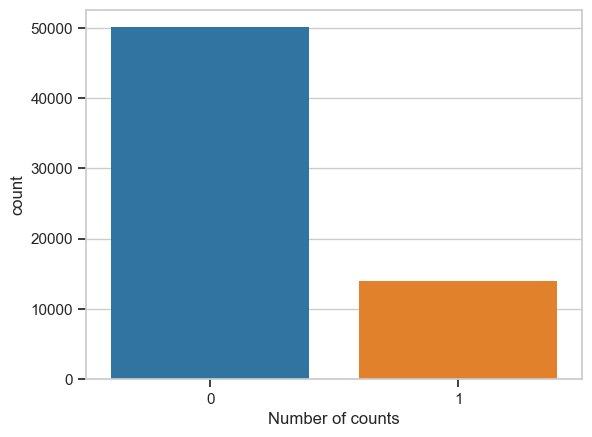

In [52]:
# Output Barplot showing the occurence of flight outcome

sns.set_context("notebook")
g=sns.countplot(x="FLIGHT_STATUS",data=flight_data)
g.set(xlabel="Number of counts")

[Text(0.5, 0, 'Number of counts')]

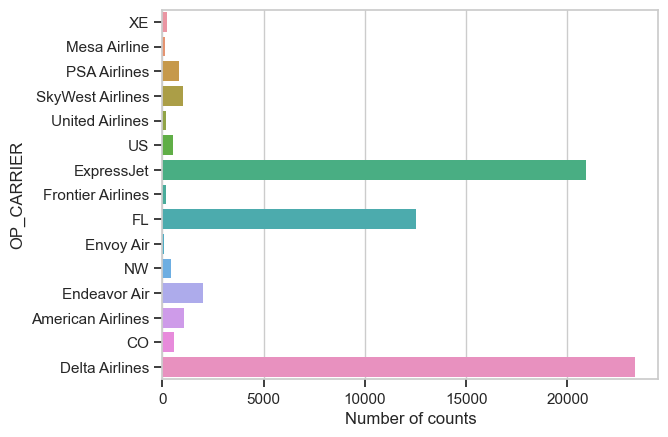

In [53]:
# Output Barplot showing the occurence of each categorical features         

sns.set_context("notebook")
g=sns.countplot(y="OP_CARRIER",data=flight_category)
g.set(xlabel="Number of counts")

[Text(0.5, 0, 'Number of counts')]

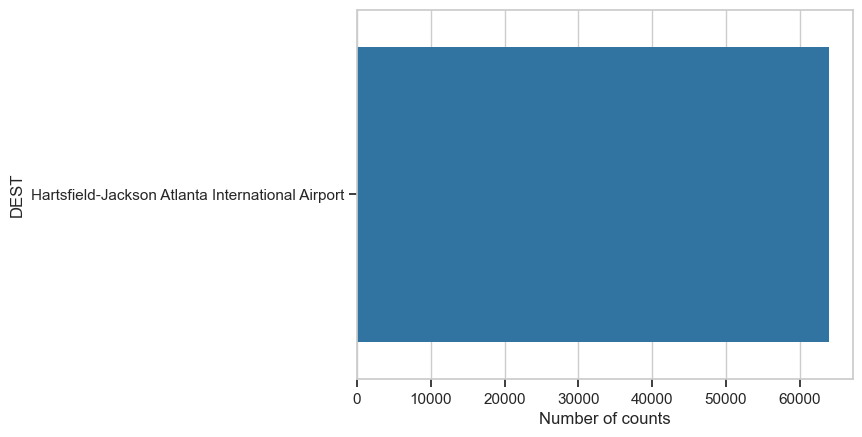

In [54]:
# Output Barplot showing the occurence of each categorical features         

sns.set_context("notebook")
g=sns.countplot(y="DEST",data=flight_category)
g.set(xlabel="Number of counts")

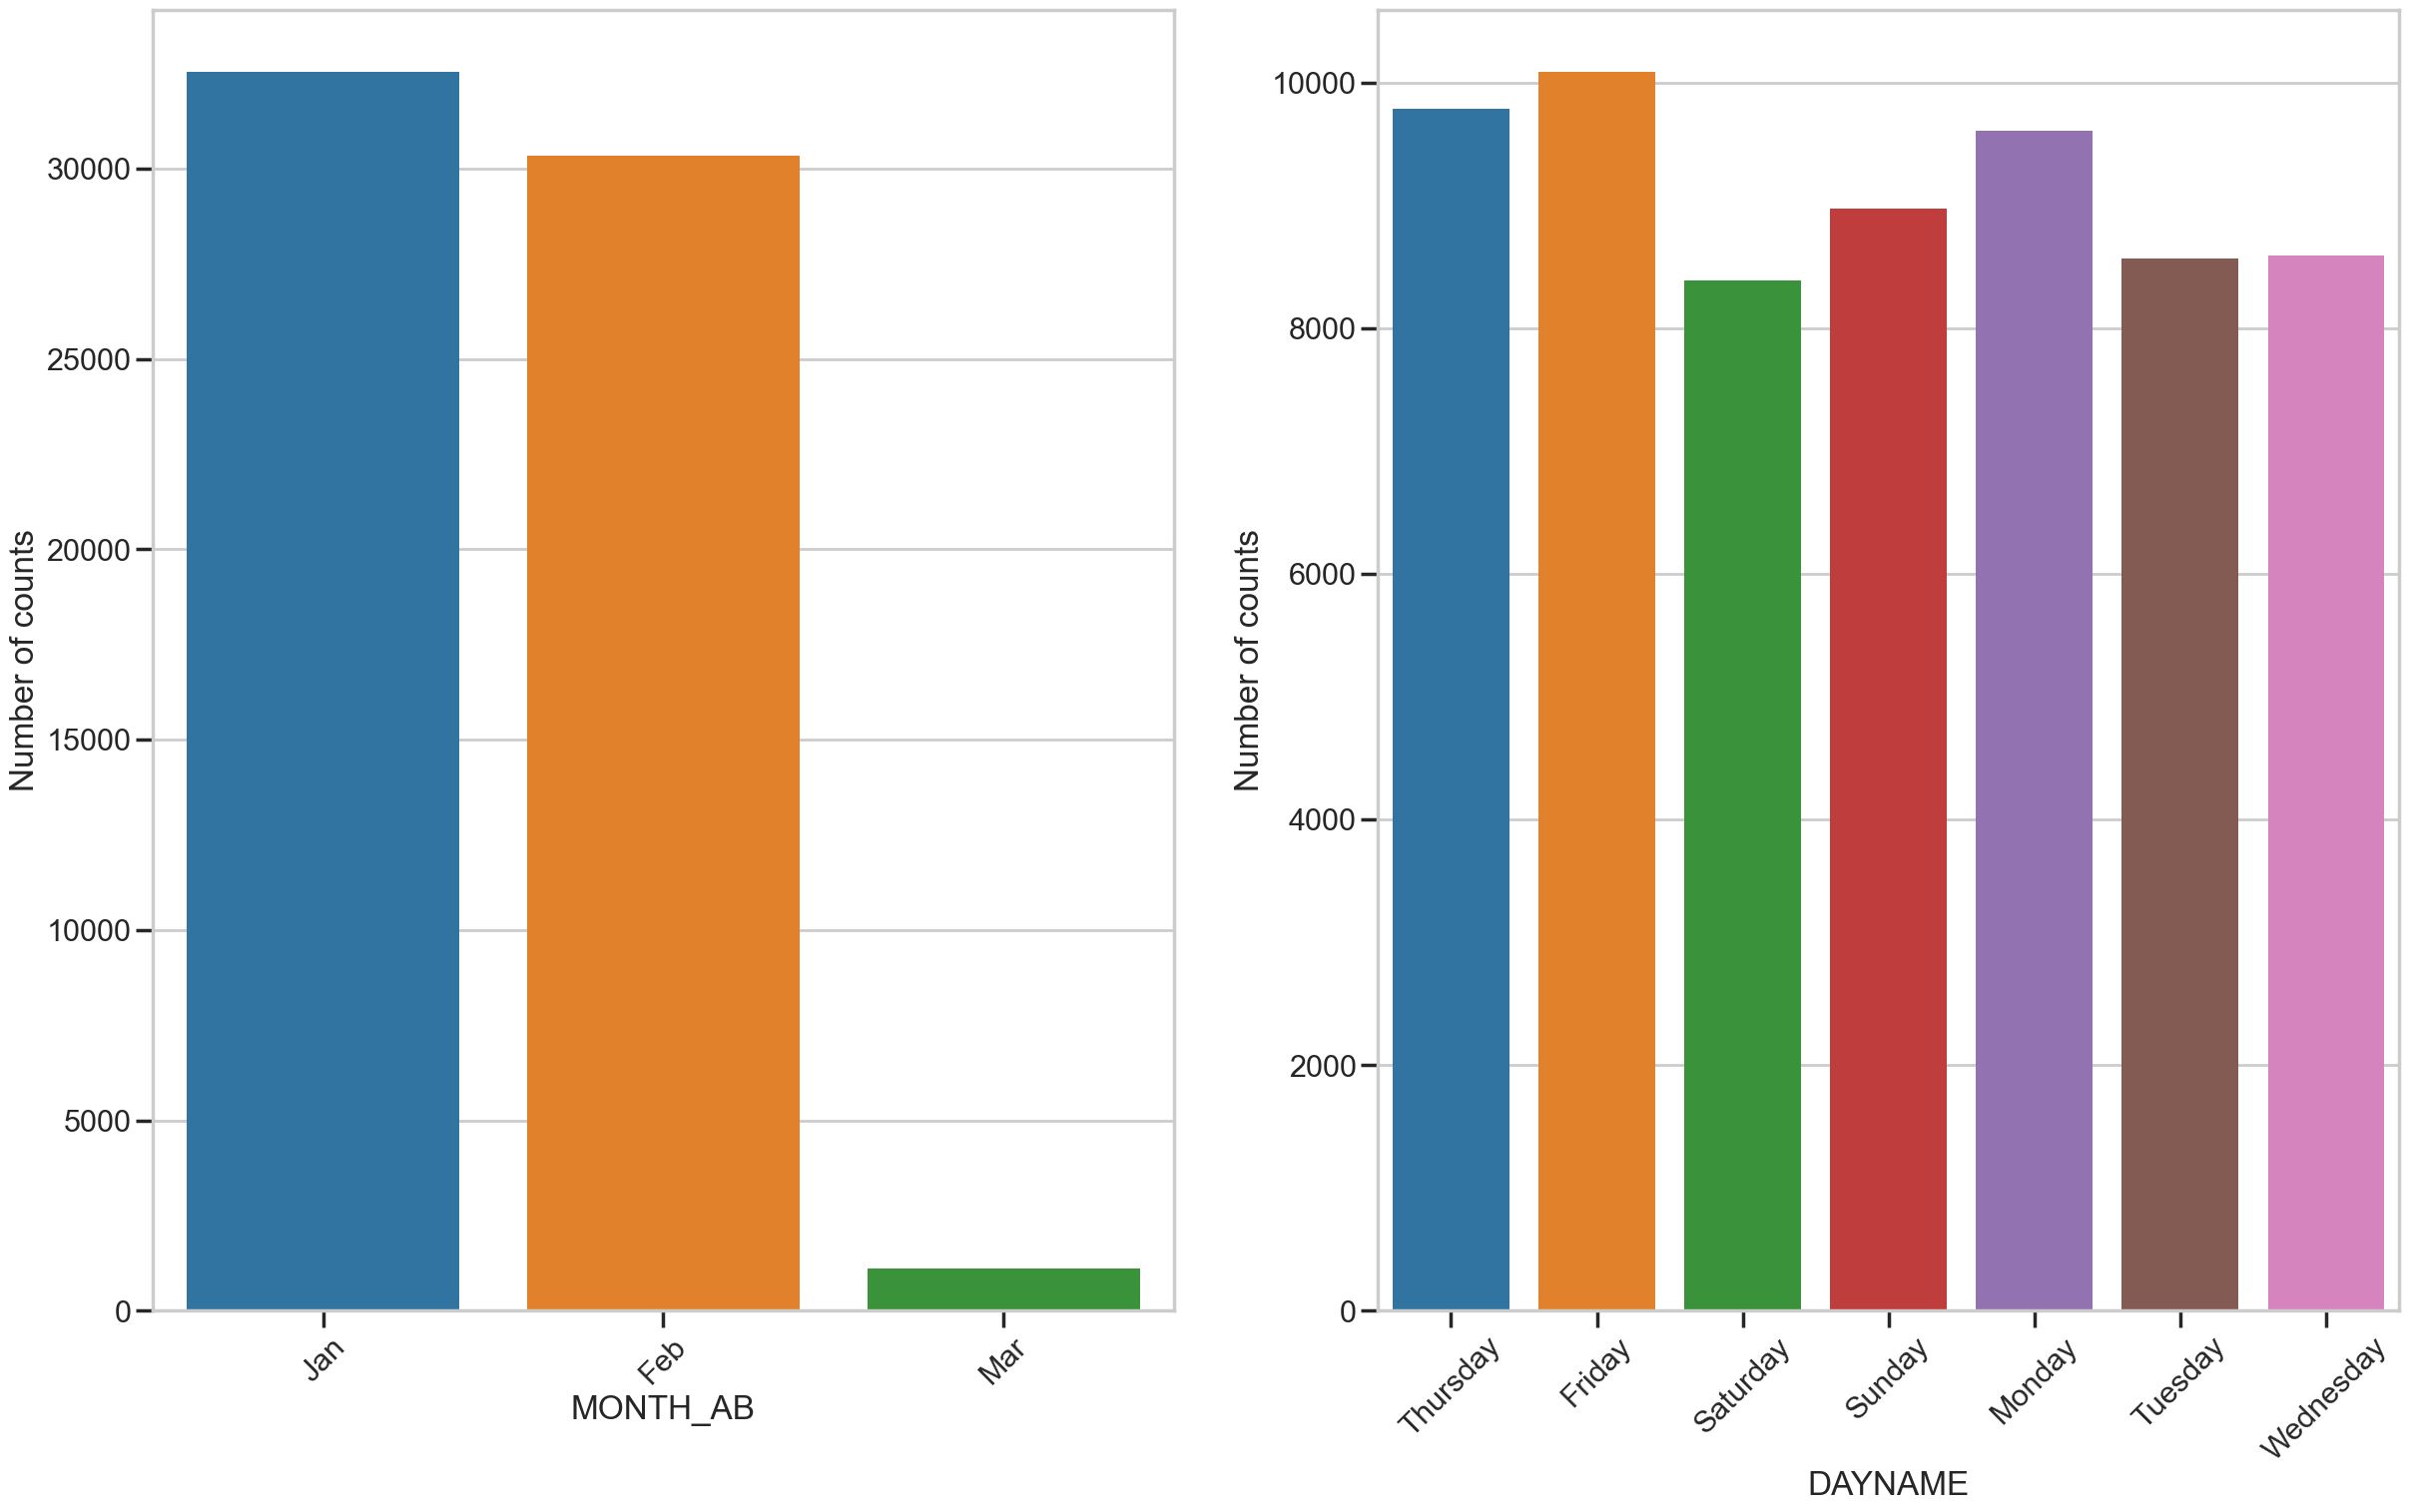

In [55]:
# Finding categorical features

category = []
for i in flight_category:
    if i in ["ORIGIN","DEST","OP_CARRIER","FLIGHT_STATUS"]:
        pass
    else:
        category.append(i)
        
# Output Barplot showing the occurence of each categorical features         
fig, ax = plt.subplots(ncols=2, figsize=(12,12))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2.5)
sns.color_palette("husl", 8)
sns.set_context("poster")

#ncols=2,nrows=round(len(list(category))/2)

for i, feature in enumerate(list(flight_category[category]), 1):
    plt.subplot(len(list(category)), 2, i)
    g=sns.countplot(x=feature,data=flight_category)
    g.set(ylabel="Number of counts")
    plt.xticks(rotation=45)
   
plt.show()


####Classification Modelling

In [56]:
Carrier = pd.get_dummies(flight_data['OP_CARRIER'],prefix="OP_CARRIER",drop_first=False)
#Destination = pd.get_dummies(flight_data['DEST'],drop_first=False)
#Destination.columns = ['Charlotte_Airport','Chicago_Airport','Dallas_Airpot','Denver_Airport','Dentroit_Airport','GELL_Airpot','George_Aiport','Hartsfield_Airport','JohnFKeenedy_Airpot','LaGuardia_Airport','LosAngelas_Airport','McCarran_Airport','MSP_Airport','NL_Airport','Orlando_Airport','Philadelphia_Airport','Phoenix_Airport','Ronald_Airport','SanFrancisco_Airport','Seattle_Aiport']                  
month= pd.get_dummies(flight_data['MONTH_AB'],prefix="MONTH",drop_first=False)
day= pd.get_dummies(flight_data['DAYNAME'],prefix="DAY",drop_first=False)

#flight_data_new=pd.concat([flight_data,Carrier,Destination,month,day],axis=1)
flight_data_new=pd.concat([flight_data,Carrier,month,day],axis=1)

In [57]:
flight_data_new.head(2)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse,DAY,MONTH,MONTH_AB,DAYOFWEEK,DAYNAME,WEEKDAY,FLIGHT_STATUS,OP_CARRIER_American Airlines,OP_CARRIER_CO,OP_CARRIER_Delta Airlines,OP_CARRIER_Endeavor Air,OP_CARRIER_Envoy Air,OP_CARRIER_ExpressJet,OP_CARRIER_FL,OP_CARRIER_Frontier Airlines,OP_CARRIER_Mesa Airline,OP_CARRIER_NW,OP_CARRIER_PSA Airlines,OP_CARRIER_SkyWest Airlines,OP_CARRIER_US,OP_CARRIER_United Airlines,OP_CARRIER_XE,MONTH_Feb,MONTH_Jan,MONTH_Mar,DAY_Friday,DAY_Monday,DAY_Saturday,DAY_Sunday,DAY_Thursday,DAY_Tuesday,DAY_Wednesday
6,2009-01-01,XE,Cleveland Hopkins International Airport,Hartsfield-Jackson Atlanta International Airport,-8.0,12.0,5.0,-17.0,0,117,108.0,91.0,554,0.0,0.0,0.0,0.0,0.0,12.0,5.0,1,1,Jan,3,Thursday,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
20,2009-01-01,XE,Newark Liberty International Airport,Hartsfield-Jackson Atlanta International Airport,0.0,15.0,9.0,-12.0,0,161,149.0,125.0,745,0.0,0.0,0.0,0.0,0.0,15.0,9.0,1,1,Jan,3,Thursday,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0


In [58]:
# Drop the redundant columns 

flight_data_new.drop(['FL_DATE', 
                      'OP_CARRIER',
                      'ORIGIN',
                      'DEST',
                      'DAYOFWEEK',
                      'MONTH',
                      'MONTH_AB',
                      'DAY',
                      'DAYNAME',
                      'WEEKDAY',
                      'ARR_DELAY',
                      'CARRIER_DELAY',
                      'WEATHER_DELAY',
                      'NAS_DELAY',
                      'SECURITY_DELAY',
                      'LATE_AIRCRAFT_DELAY'
                 ],
                 axis = 1, inplace = True)

In [59]:
flight_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64003 entries, 6 to 1047646
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DEP_DELAY                     64003 non-null  float64
 1   TAXI_OUT                      64003 non-null  float64
 2   TAXI_IN                       64003 non-null  float64
 3   DIVERTED                      64003 non-null  int64  
 4   CRS_ELAPSED_TIME              64003 non-null  int64  
 5   ACTUAL_ELAPSED_TIME           64003 non-null  float64
 6   AIR_TIME                      64003 non-null  float64
 7   DISTANCE                      64003 non-null  int64  
 8   WHEELS_OFF_elapse             64003 non-null  float64
 9   WHEELS_ON_elapse              64003 non-null  float64
 10  FLIGHT_STATUS                 64003 non-null  int64  
 11  OP_CARRIER_American Airlines  64003 non-null  uint8  
 12  OP_CARRIER_CO                 64003 non-null  uint8  
 13 

In [60]:
pip install feature-engine

Note: you may need to restart the kernel to use updated packages.


In [61]:
from sklearn.model_selection import train_test_split
from feature_engine.selection import DropConstantFeatures

In [62]:
# separate train and test (again, as we transformed the previous ones)

X_train, X_test, y_train, y_test = train_test_split(
    flight_data_new.drop(labels=['FLIGHT_STATUS'], axis=1),
    flight_data_new['FLIGHT_STATUS'],
    test_size=0.2,
    random_state=100)

X_train.shape, X_test.shape

((51202, 35), (12801, 35))

In [63]:
sel = DropConstantFeatures(tol=1, variables=None, missing_values='raise')
sel.fit(X_train)

DropConstantFeatures()

In [64]:
# number of quasi-constant features

len(sel.features_to_drop_)

1

In [65]:
sel.features_to_drop_

['DIVERTED']

In [66]:
# Drop the redundant columns 
flight_data_new.drop(['DIVERTED'], axis = 1, inplace = True)

In [67]:
#remove the constant features

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((51202, 34), (12801, 34))

In [68]:
# build a dataframe with the correlation between features
# remember that the absolute value of the correlation
# coefficient is important and not the sign

corrmat = X_train.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']

In [69]:
corrmat

,feature1,feature2,corr
0,CRS_ELAPSED_TIME,AIR_TIME,0.976137
1,AIR_TIME,CRS_ELAPSED_TIME,0.976137
2,DISTANCE,AIR_TIME,0.968405
3,AIR_TIME,DISTANCE,0.968405
4,AIR_TIME,ACTUAL_ELAPSED_TIME,0.967234
5,ACTUAL_ELAPSED_TIME,AIR_TIME,0.967234
6,MONTH_Jan,MONTH_Feb,0.966542
7,MONTH_Feb,MONTH_Jan,0.966542
8,DISTANCE,CRS_ELAPSED_TIME,0.966197
9,CRS_ELAPSED_TIME,DISTANCE,0.966197


In [70]:
corrmat.feature1.unique()

array(['CRS_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'ACTUAL_ELAPSED_TIME',
       'MONTH_Jan', 'MONTH_Feb'], dtype=object)

In [71]:




grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 2 correlated groups
out of 34 total features


In [72]:
# now we can print out each group. We see that some groups contain
# only 2 correlated features, some other groups present several features 
# that are correlated among themselves.

for group in correlated_groups:
    print(group)
    print()

            feature1             feature2      corr
0   CRS_ELAPSED_TIME             AIR_TIME  0.976137
9   CRS_ELAPSED_TIME             DISTANCE  0.966197
10  CRS_ELAPSED_TIME  ACTUAL_ELAPSED_TIME  0.951825

    feature1   feature2      corr
6  MONTH_Jan  MONTH_Feb  0.966542



In [73]:
# we can now investigate further features within one group.
# let's for example select group 1

group = correlated_groups[0]
group

,feature1,feature2,corr
0,CRS_ELAPSED_TIME,AIR_TIME,0.976137
9,CRS_ELAPSED_TIME,DISTANCE,0.966197
10,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,0.951825


In [74]:
from sklearn.ensemble import RandomForestClassifier

# add all features of the group to a list
features = list(group['feature2'].unique())+['CRS_ELAPSED_TIME']

# train a random forest 
rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=4)
rf.fit(X_train[features].fillna(0), y_train)

RandomForestClassifier(max_depth=4, random_state=100)

In [75]:
# get the feature importance attributed by the 
# random forest model (more on this in coming lectures)

importance = pd.concat(
    [pd.Series(features),
     pd.Series(rf.feature_importances_)], axis=1)

importance.columns = ['feature', 'importance']

# sort features by importance, most important first
importance.sort_values(by='importance', ascending=False)

,feature,importance
2,ACTUAL_ELAPSED_TIME,0.496654
3,CRS_ELAPSED_TIME,0.296414
1,DISTANCE,0.140793
0,AIR_TIME,0.066139


In [76]:
# Drop the redundant columns 
flight_data_new.drop(['CRS_ELAPSED_TIME','AIR_TIME'], axis = 1, inplace = True)

In [77]:
# build a dataframe with the correlation between features
# remember that the absolute value of the correlation
# coefficient is important and not the sign

corrmat = X_train.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat <= -0.8]
corrmat = corrmat[corrmat > -1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']

In [78]:
grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 0 correlated groups
out of 34 total features


In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    flight_data_new.drop(labels=['FLIGHT_STATUS'], axis=1),
    flight_data_new['FLIGHT_STATUS'],
    test_size=0.2,
    random_state=100)

X_train.shape, X_test.shape

((51202, 32), (12801, 32))

In [80]:
rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=5)
rf.fit(X_train, y_train)
rf.feature_importances_

array([5.51235583e-01, 1.48773495e-01, 3.06116757e-02, 2.75560386e-02,
       1.96700206e-02, 1.55991052e-01, 2.40050393e-02, 2.69029438e-05,
       2.51470885e-04, 3.53990232e-03, 2.79761472e-04, 2.92945506e-05,
       6.60780256e-03, 2.15874723e-04, 2.19600911e-05, 1.43434707e-05,
       5.59818847e-05, 3.67368150e-03, 8.69308815e-05, 1.15254659e-04,
       2.67912733e-05, 5.75808228e-05, 5.87054356e-03, 4.94905048e-03,
       5.77591681e-03, 3.26511749e-04, 6.59853770e-04, 2.10585966e-04,
       1.31631934e-03, 4.15256195e-03, 1.34910558e-03, 2.54311240e-03])

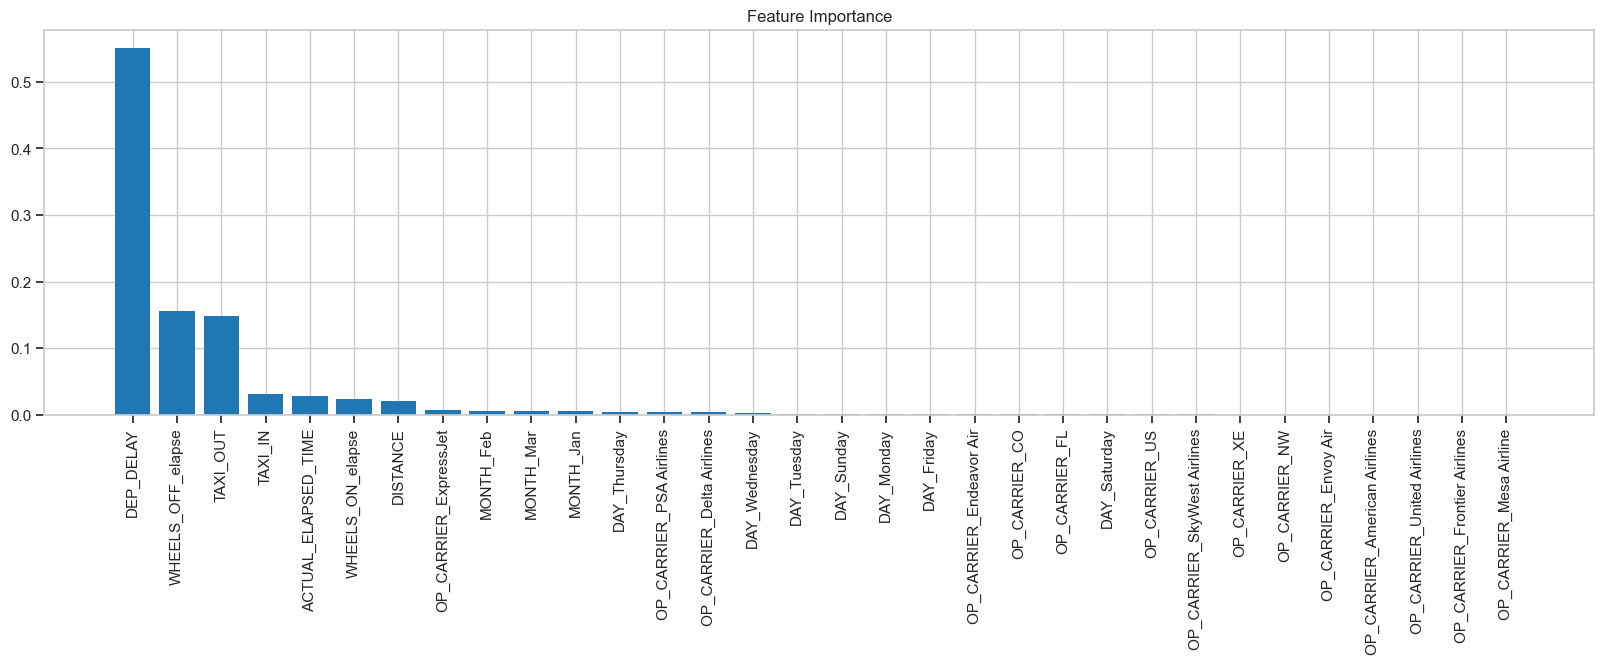

In [81]:
# Sorting in descending order and rearranging feature names to match sorted feature importance
importance = rf.feature_importances_
indices = np.argsort(importance)[::-1] 
names = [X_train.columns[i] for i in indices]

# Bar chart creation
sns.set_context("notebook")
plt.figure(figsize=(20, 5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importance[indices])
plt.xticks(range(X_train.shape[1]), names, rotation = 90)

plt.show()

In [82]:
features=pd.DataFrame(names)
scale = pd.DataFrame(importance[indices])
keep_features = pd.concat([features, scale],axis=1)
keep_features

,0,0
0,DEP_DELAY,0.551236
1,WHEELS_OFF_elapse,0.155991
2,TAXI_OUT,0.148773
3,TAXI_IN,0.030612
4,ACTUAL_ELAPSED_TIME,0.027556
5,WHEELS_ON_elapse,0.024005
6,DISTANCE,0.019670
7,OP_CARRIER_ExpressJet,0.006608
8,MONTH_Feb,0.005871
9,MONTH_Mar,0.005776


###Classification Modelling

In [83]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score, 
    accuracy_score, 
    confusion_matrix, 
    classification_report, 
    plot_confusion_matrix,
    plot_precision_recall_curve
)

In [84]:
flight_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64003 entries, 6 to 1047646
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DEP_DELAY                     64003 non-null  float64
 1   TAXI_OUT                      64003 non-null  float64
 2   TAXI_IN                       64003 non-null  float64
 3   ACTUAL_ELAPSED_TIME           64003 non-null  float64
 4   DISTANCE                      64003 non-null  int64  
 5   WHEELS_OFF_elapse             64003 non-null  float64
 6   WHEELS_ON_elapse              64003 non-null  float64
 7   FLIGHT_STATUS                 64003 non-null  int64  
 8   OP_CARRIER_American Airlines  64003 non-null  uint8  
 9   OP_CARRIER_CO                 64003 non-null  uint8  
 10  OP_CARRIER_Delta Airlines     64003 non-null  uint8  
 11  OP_CARRIER_Endeavor Air       64003 non-null  uint8  
 12  OP_CARRIER_Envoy Air          64003 non-null  uint8  
 13 

In [85]:
flight_data_new["FLIGHT_STATUS"] = flight_data_new["FLIGHT_STATUS"].astype('category')
flight_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64003 entries, 6 to 1047646
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   DEP_DELAY                     64003 non-null  float64 
 1   TAXI_OUT                      64003 non-null  float64 
 2   TAXI_IN                       64003 non-null  float64 
 3   ACTUAL_ELAPSED_TIME           64003 non-null  float64 
 4   DISTANCE                      64003 non-null  int64   
 5   WHEELS_OFF_elapse             64003 non-null  float64 
 6   WHEELS_ON_elapse              64003 non-null  float64 
 7   FLIGHT_STATUS                 64003 non-null  category
 8   OP_CARRIER_American Airlines  64003 non-null  uint8   
 9   OP_CARRIER_CO                 64003 non-null  uint8   
 10  OP_CARRIER_Delta Airlines     64003 non-null  uint8   
 11  OP_CARRIER_Endeavor Air       64003 non-null  uint8   
 12  OP_CARRIER_Envoy Air          64003 non-null

In [86]:
flight_data_new.to_csv('flight_data_new.csv',index=False)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(
    flight_data_new.drop(labels=['FLIGHT_STATUS'], axis=1),
    flight_data_new['FLIGHT_STATUS'],
    test_size=0.2,
    random_state=100)

X_train.shape, X_test.shape

((51202, 32), (12801, 32))

####Random Forest

In [88]:
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=4)
    rf.fit(X_train, y_train)

    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Roc-auc Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Random Forest test:', accuracy_score(y_test, rf.predict(X_test)))
    print()
    print('Precision Random Forest test:', precision_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('Recall Random Forest test:', recall_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('F-measure Random Forest test:', f1_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, rf.predict(X_test)))

In [89]:
run_randomForests(X_train, X_test, y_train, y_test)

Test set
Roc-auc Random Forests roc-auc: 0.9481044312427942

Accuracy Random Forest test: 0.9011014764471525

Precision Random Forest test: 0.9399646851088875

Recall Random Forest test: 0.5784136182542557

F-measure Random Forest test: 0.7161434977578476

Summary Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     10040
           1       0.94      0.58      0.72      2761

    accuracy                           0.90     12801
   macro avg       0.92      0.78      0.83     12801
weighted avg       0.90      0.90      0.89     12801



###Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
def run_logisticReg(X_train, X_test, y_train, y_test):
    lr = LogisticRegression(random_state=100)
    lr.fit(X_train, y_train)

    print('Test set')
    pred = lr.predict_proba(X_test)
    print('Roc-auc Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Logistic Regression:', accuracy_score(y_test, lr.predict(X_test)))
    print()
    print('Precision Logistic Regression:', precision_score(y_test, lr.predict(X_test),pos_label=1))
    print()
    print('Recall Logistic Regression:', recall_score(y_test, lr.predict(X_test),pos_label=1))
    print()
    print('F-measure Logistic Regression:', f1_score(y_test, lr.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, lr.predict(X_test)))

In [92]:
run_logisticReg(X_train, X_test, y_train, y_test)

Test set
Roc-auc Logistic Regression roc-auc: 0.9699882469398033

Accuracy Logistic Regression: 0.9243027888446215

Precision Logistic Regression: 0.8736447039199333

Recall Logistic Regression: 0.758783049619703

F-measure Logistic Regression: 0.8121729017251406

Summary Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10040
           1       0.87      0.76      0.81      2761

    accuracy                           0.92     12801
   macro avg       0.90      0.86      0.88     12801
weighted avg       0.92      0.92      0.92     12801



###Decision Tree

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
def run_DT(X_train, X_test, y_train, y_test):
    DT = DecisionTreeClassifier(random_state=100)
    DT = DT.fit(X_train,y_train)

    print('Test set')
    pred = DT.predict_proba(X_test)
    print('Roc-auc Decision Tree roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Decision Tree:', accuracy_score(y_test, DT.predict(X_test)))
    print()
    print('Precision Decision Tree:', precision_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('Recall Decision Tree:', recall_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('F-measure Decision Tree:', f1_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, DT.predict(X_test)))

In [95]:
run_DT(X_train, X_test, y_train, y_test)

Test set
Roc-auc Decision Tree roc-auc: 0.8754119884099963

Accuracy Decision Tree: 0.9174283259120382

Precision Decision Tree: 0.8130051432770022

Recall Decision Tree: 0.8015211879753712

F-measure Decision Tree: 0.8072223235455043

Summary Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10040
           1       0.81      0.80      0.81      2761

    accuracy                           0.92     12801
   macro avg       0.88      0.88      0.88     12801
weighted avg       0.92      0.92      0.92     12801

